Quick stats on the users
total number of users: 153704
Number of users with known locations: 122425
Users originate from:  194 different locations


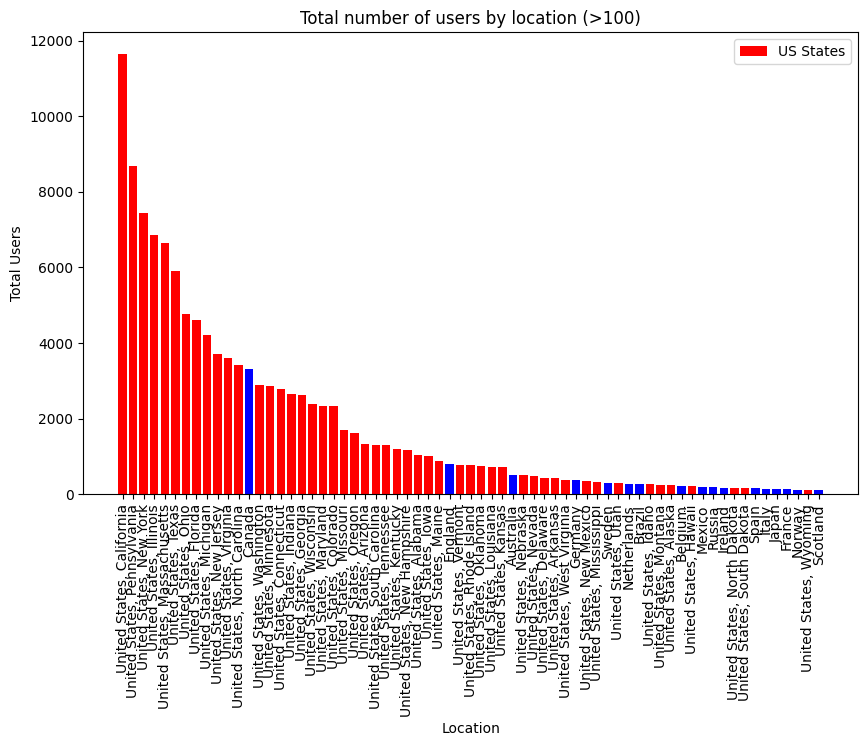

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math





users = pd.read_csv('minimizedData/BA_users_small.csv')
print("Quick stats on the users")
print("total number of users:", users.shape[0])
#Remove users with unknown locations
users = users.dropna(subset=['location'])
print("Number of users with known locations:", users.shape[0])
print("Users originate from: ",users['location'].dropna().nunique() , "different locations")


#plotting user location distributions
user_counts = users.groupby('location').size().reset_index(name='total_users')
user_counts = user_counts[user_counts['total_users'] >= 100]
user_counts = user_counts.sort_values(by='total_users', ascending=False)
user_counts['color'] = user_counts['location'].apply(lambda x: 'red' if x.startswith('United States,') else 'blue')
plt.figure(figsize=(10, 6))
plt.bar(user_counts['location'], user_counts['total_users'], color=user_counts['color'], )
plt.xlabel('Location')
plt.ylabel('Total Users')

plt.legend(['US States'], loc="upper right")
plt.title('Total number of users by location (>100)')
plt.xticks(rotation=90)


plt.savefig("modules/2.png")
